In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

# Part 1. Using Naïve Bayes to work with Text Data

In [ ]:
# Give a simple dataset
# simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']
# Learn the 'vocabulary' of the training data: convert text into a matrix of token counts.
# Transform training data into a 'document-term matrix' (which is a sparse matrix).
# Print the sparse matrix.
# Convert the sparse matrix to a dense matrix (Tip: you can use “toarray()”)
# Examine the vocabulary and document-term matrix together
# Transform testing data into a document-term matrix (using existing vocabulary)
# use the test data as:
# simple_test = ["please don't call me"]
# Examine the vocabulary and document-term matrix together

In [2]:
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

vectorizer = CountVectorizer()

# tokenuze and build vocabulary
vectorizer.fit(simple_train)
print("Features:")
print(vectorizer.get_feature_names())
print("-" * 80)

# transform data into a document-term-matrix
vector = vectorizer.transform(simple_train)
print("Sparse matrix:\n", vector)
print("-" * 80)

# sparse matrix to dense matrix
print("Dense matrix:\n", vector.toarray())
print("-" * 80)

print("Examine the vocabulary and document-term matrix together")
print(pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names()))
print("-" * 80)

simple_test = ["please don't call me"]
print("Test:")
print(simple_test)
print("-" * 80)

vector2 = vectorizer.transform(simple_test)
print("Matrix")
print(vector2.toarray())
print("-" * 80)

print("Examine the vocabulary and document-term matrix together")
print(pd.DataFrame(vector2.toarray(), columns=vectorizer.get_feature_names()))
print("-" * 80)

Features:
['cab', 'call', 'me', 'please', 'tonight', 'you']
--------------------------------------------------------------------------------
Sparse matrix:
   (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2
--------------------------------------------------------------------------------
Dense matrix:
 [[0 1 0 0 1 1]
 [1 1 1 0 0 0]
 [0 1 1 2 0 0]]
--------------------------------------------------------------------------------
Examine the vocabulary and document-term matrix together
   cab  call  me  please  tonight  you
0    0     1   0       0        1    1
1    1     1   1       0        0    0
2    0     1   1       2        0    0
--------------------------------------------------------------------------------
Test:
["please don't call me"]
--------------------------------------------------------------------------------
Matrix
[[0 1 1 1 0 0]]
--------------------------------------------------------------------------------
Examine the

In [ ]:
# Analyzing SMS data with Naïve Bayes [20 pts]
# Read into the data from the file “sms.tsv”; give the names of columns as ['label', 'message']; and print the first 10 samples to view part of the data.
# sms.tsv download  
# Convert label to a numeric variable.
# Then define the X and y
# Split into training and testing sets by train_test_split(); and print the shape of training set and test set.
# Use the two Naïve Bayes models (GaussianNB and MultinomialNB) to finish the following requirements, respectively:
#     calculate accuracy of predictions
#     give the confusion matrix
#     print message text for the false positives
#     print message text for the false negatives

In [3]:
sms = pd.read_table('sms.tsv', header=None, names=["label", "message"])
sms.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
pd.unique(sms['label'])

array(['ham', 'spam'], dtype=object)

In [5]:
sms['num_l'] = sms['label'].map({'ham': 0, 'spam': 1})
sms.head()

,label,message,num_l
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
X = sms['message']
y = sms['num_l']

In [7]:
print("Shape:")
print("X: ", X.shape)
print("y: ", y.shape)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

print("Xtrain: ", Xtrain.shape)
print("Xtest: ", Xtest.shape)
print("ytrain: ", ytrain.shape)
print("ytest: ", ytest.shape)

Shape:
X:  (5572,)
y:  (5572,)
Xtrain:  (4179,)
Xtest:  (1393,)
ytrain:  (4179,)
ytest:  (1393,)


In [8]:
vectorize = CountVectorizer()

vector_train = vectorize.fit_transform(Xtrain)

vector_test = vectorize.transform(Xtest)

In [9]:
# Analysis using GuassianNB Naive Bayes model
print("GaussianNB")
gaussnb = GaussianNB()
gaussnb.fit(vector_train.toarray(), ytrain)
predictions = gaussnb.predict(vector_test.toarray())

print("Accuracy: ", metrics.accuracy_score(ytest, predictions))
print("Predictions: ", predictions)

print("Confusion matrix: \n", metrics.confusion_matrix(ytest, predictions))

print('-' * 80)
print('False positives')
# print(Xtest[(predictions == 1) & (ytest == 0)])
print(Xtest[predictions > ytest])

print('\nFalse negatives')
print(Xtest[predictions < ytest])

GaussianNB
Accuracy:  0.9030868628858578
Predictions:  [0 1 1 ... 0 1 0]
Confusion matrix: 
 [[1071  116]
 [  19  187]]
--------------------------------------------------------------------------------
False positives
4536                        IM LATE TELLMISS IM ON MY WAY
495                      Are you free now?can i call now?
3376                                                  :) 
1515                         K:)all the best:)congrats...
606                             TaKe CaRE n gET WeLL sOOn
                              ...                        
5363    I think your mentor is , but not 100 percent s...
1033                           HAPPY NEW YEAR MY NO.1 MAN
857                         Going to take your babe out ?
5211                      It is only yesterday true true.
3179                    K k :-):-) then watch some films.
Name: message, Length: 116, dtype: object

False negatives
2003    TheMob>Yo yo yo-Here comes a new selection of ...
5449    Latest News! Police 

In [10]:
# Analysis using MultinomialNB Naive Bayes model
print("MultinomialNB")
multinb = MultinomialNB()
multinb.fit(vector_train.toarray(), ytrain)
predictions = multinb.predict(vector_test.toarray())

print("Accuracy: ", metrics.accuracy_score(ytest, predictions))
print("Predictions: ", predictions)

print("Confusion matrix: \n", metrics.confusion_matrix(ytest, predictions))

print('-' * 80)
print('False positives')
# print(Xtest[(predictions == 1) & (ytest == 0)])
print(Xtest[predictions > ytest])

print('\nFalse negatives')
print(Xtest[predictions < ytest])

MultinomialNB
Accuracy:  0.9827709978463748
Predictions:  [0 0 0 ... 0 0 0]
Confusion matrix: 
 [[1182    5]
 [  19  187]]
--------------------------------------------------------------------------------
False positives
3890                    Unlimited texts. Limited minutes.
3446    wiskey Brandy Rum Gin Beer Vodka Scotch Shampa...
574                                Waiting for your call.
4702                               I liked the new mobile
991                                          26th OF JULY
Name: message, dtype: object

False negatives
5449    Latest News! Police station toilet stolen, cop...
4213    Missed call alert. These numbers called but le...
1663    Hi if ur lookin 4 saucy daytime fun wiv busty ...
2430    Guess who am I?This is the first time I create...
5       FreeMsg Hey there darling it's been 3 week's n...
2774    How come it takes so little time for a child w...
4676    Hi babe its Chloe, how r u? I was smashed on s...
2663    Hello darling how are you toda

# Part 2: Analyzing Boston housing

In [52]:
from sklearn.datasets import load_boston
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [ ]:
# Data: import load_boston from sklearn.datasets 
# Goal: Using Linear Regression to analyze Boston housing
# Tasks:
#     Read into the data and process it in the right format for using machine learning.
#     Then, use the DataFrame corr() method to show what features are correlated with each other.
#     The columns don't have any labels. Given the name of columns as ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']; then use the DataFrame corr() again.
#     Now, you have the numbers from the correlation matrix, but it's not as easy to view or interpret as a plot. Please write codes to plot correlations by color same as (similar with) the following figure:
#     According to your output, answer the following questions:
# In the above plot, what features are highly correlated? Which features are highly uncorrelated?
#     Next, building the Linear Regression Model
# First, please split the data into two datasets as training and test sets. According to the four steps taught in the classes, please train the model by linear regression and predict.
# Please print the coefficient for your model from the above results. It requires you to print each element of the coefficient and the corresponding the feature names.
# Finally, to gain an understanding of how your model is performing, please score the model against 2 metrics: R squared and mean squared error. Write the lines of code to get your output; and answer the questions:
# (a) What do the metrics of R Squared and Mean Squared Error? What are the numbers telling you?
# (b) What you think could improve the model?

In [12]:
housing_data = load_boston()
df = pd.DataFrame(housing_data.data)

# Initial correleation
df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [13]:
df.columns = housing_data.feature_names
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


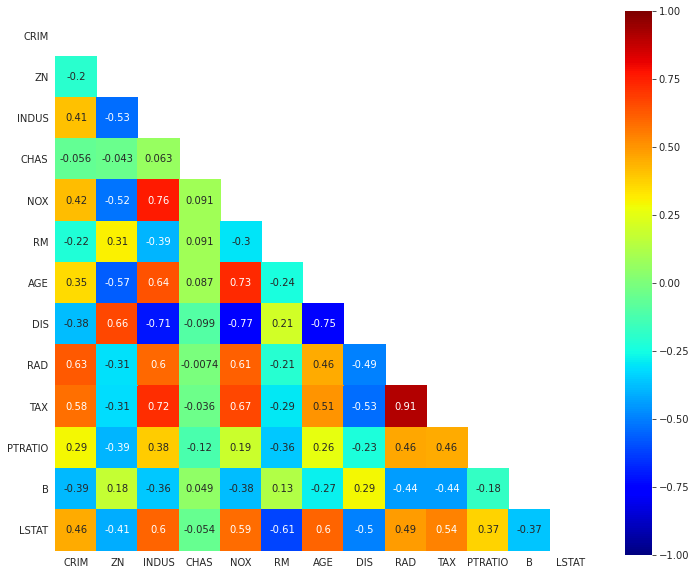

In [17]:
plt.figure(figsize=(12, 10))
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin=-1.0, vmax=1.0, square=True, cmap="jet", annot=True)
plt.show()

### Highly correlated = RAD & TAX
### Highly uncorrelated = NOX & DIS

In [28]:
X = df
y = housing_data.target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.59, random_state=5)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(207, 13)
(299, 13)
(207,)
(299,)


Text(0.5, 1.0, 'Prices vs Predicted prices: $y_i$ vs $\\hat{y}_i$')

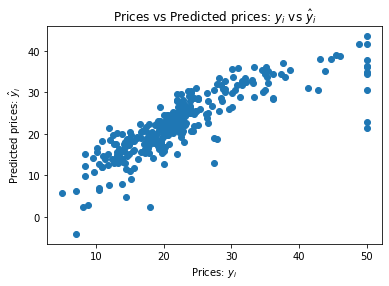

In [33]:
lr = LinearRegression()
lr.fit(Xtrain, ytrain)

prediction = lr.predict(Xtest)

plt.scatter(ytest, prediction)
plt.xlabel("Prices: $y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices: $y_i$ vs $\hat{y}_i$")

In [36]:
cross_validation_Score = cross_val_score(lr, X, y, cv=5)
cross_validation_Score.mean()

0.35327592439588507

In [39]:
print("Model slope:    ", lr.coef_[0])
print("Model intercept:", lr.intercept_)

Model slope:     -0.1577442173086457
Model intercept: 35.565087759950856


A negative coefficient suggests that as the independent variable increases,
the dependent variable tends to decrease.

In [44]:
y_train_predict = lr.predict(Xtrain)
rmse = (np.sqrt(mean_squared_error(ytrain, y_train_predict)))
r2 = r2_score(ytrain, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lr.predict(Xtest)
rmse = (np.sqrt(mean_squared_error(ytest, y_test_predict)))
r2 = r2_score(ytest, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.575017948592659
R2 score is 0.7589301355975604


The model performance for testing set
--------------------------------------
RMSE is 4.945637004086548
R2 score is 0.7044144046757219


R-squared :R-squared is the ratio of the variance of the residuals divided by the variance of the data we are modeling, 
           and in so doing, is a measure of how much of the variance in your data is "explained" by your model, 
           as expressed in the spread of the residuals. Higher the numerical value better the model fits.
           .i.e., better the independent variable account for the dependent variable.

Mean_squared_error :The mean_squared_error function computes mean square error, 
                    a risk metric corresponding to the expected value of the squared (quadratic) error or loss.

Mean_absolute_error :Mean absolute error (MAE) is a measure of difference between two continuous variables. 
                     It is the average vertical distance between each point and the identity line. 
                     MAE is also the average horizontal distance between each point and the identity line.

The sign of a regression coefficient tells you whether there is a positive or negative correlation 
between each independent variable and the dependent variable. 

+ve coefficient means high correlation

A MAE of 0 means that our model is a perfect predictor of the outputs.
The MAE does not indicate underperformance or overperformance of the model.
The error grows quadratically in MSE. Higher the R-squared, the better the model fits your data.

For linear regression standard equation: Y=a+bX, 
considering MSE equals to the sum of squared differences between actual sample values of X´train and Y´ train 
that are used to fit the linear model, and divided by number of paird samples (n).

In [50]:
mse = mean_squared_error(ytest, prediction)
print(mse)

24.459325376190165


In [55]:
mean_absolute_error(ytest, prediction)

3.377523433618097

To improve accuracy of the model -

- Remove the outliers through univariate analysis. Analyse each variable and remove data outside the 
   interquartile range if it doesn't make sense or is bad data.
- Remove multicollinearity. Remove the independent variables that have high degree of correlation between them.
- Remove independent variables that have low P value i.e. below 95% confidence interval.
- Remove outliers of regression plots like residual plot, QQ plot, scale location plot and leverage plot.
- Then retrain the model

# Part 3: Predicting Bicycle Traffic

In [182]:
# parse files
bicycle = pd.read_csv("data/BridgeBicycle.csv", index_col="Date", parse_dates=True)
weather = pd.read_csv("data/BridgeWeather.csv", index_col="DATE", parse_dates=True)

In [183]:
bicycle.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56160 entries, 2019-02-28 23:00:00 to 2012-10-03 00:00:00
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Fremont Bridge East Sidewalk  56151 non-null  float64
 1   Fremont Bridge West Sidewalk  56151 non-null  float64
dtypes: float64(2)
memory usage: 1.3 MB


In [184]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2340 entries, 2012-10-03 to 2019-02-28
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          2340 non-null   object 
 1   NAME             2340 non-null   object 
 2   LATITUDE         2340 non-null   float64
 3   LONGITUDE        2340 non-null   float64
 4   ELEVATION        2340 non-null   float64
 5   AWND             2340 non-null   float64
 6   AWND_ATTRIBUTES  2340 non-null   object 
 7   PGTM             52 non-null     float64
 8   PGTM_ATTRIBUTES  52 non-null     object 
 9   PRCP             2340 non-null   float64
 10  PRCP_ATTRIBUTES  2340 non-null   object 
 11  SNOW             2335 non-null   float64
 12  SNOW_ATTRIBUTES  2335 non-null   object 
 13  SNWD             2340 non-null   float64
 14  SNWD_ATTRIBUTES  2340 non-null   object 
 15  TAVG             2160 non-null   float64
 16  TAVG_ATTRIBUTES  2160 non-null   object 
 

In [185]:
bicycle.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-02-28 23:00:00,5.0,6.0
2019-02-28 22:00:00,4.0,27.0
2019-02-28 21:00:00,16.0,32.0
2019-02-28 20:00:00,16.0,50.0
2019-02-28 19:00:00,39.0,59.0


In [186]:
weather.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,AWND,AWND_ATTRIBUTES,PGTM,PGTM_ATTRIBUTES,PRCP,...,TMIN,TMIN_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WDF5,WDF5_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES
DATE,,,,,,,,,,,,,,,,,,,,,
2012-10-03,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,16.33,",,X",NaN,NaN,0.0,...,46,",,X",10,",,X",20.0,",,X",23.0,",,X",28.0,",,X"
2012-10-04,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,14.54,",,X",NaN,NaN,0.0,...,47,",,X",20,",,X",20.0,",,X",21.0,",,X",25.1,",,X"
2012-10-05,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,12.75,",,X",NaN,NaN,0.0,...,48,",,X",360,",,X",360.0,",,X",17.9,",,X",21.9,",,X"
2012-10-06,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,11.41,",,X",NaN,NaN,0.0,...,46,",,X",20,",,X",20.0,",,X",17.0,",,X",21.0,",,X"
2012-10-07,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",47.4444,-122.3138,112.8,2.91,",,X",NaN,NaN,0.0,...,46,",,X",30,",,X",10.0,",,X",12.1,",,X",14.1,",,X"


In [226]:
total_daily = bicycle.resample('d').sum()
total_daily['total'] = total_daily.sum(axis=1)
total_daily = total_daily[['total']]
total_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2340 entries, 2012-10-03 to 2019-02-28
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   total   2340 non-null   float64
dtypes: float64(1)
memory usage: 36.6 KB


In [227]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    total_daily[days[i]] = (total_daily.index.dayofweek == i).astype(float)

In [221]:
# import datetime
# def hrs(date):
#     """Compute the hours of daylight for the given date"""
#     days = (date - datetime.datetime(2000, 12, 21)).days
#     m = (1. - np.tan(np.radians(latitude))
#          * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
#     return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

# total_daily['hrs'] = list(map(hrs, total_daily.index))

In [228]:
from pandas.tseries.holiday import USFederalHolidayCalendar

calander = USFederalHolidayCalendar()
holidays = calander.holidays('2012', '2019')
total_daily = total_daily.join(pd.Series(1, index=holidays, name='holiday'))
total_daily['holiday'].fillna(0, inplace=True)

total_daily.tail()

,total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2019-02-24,933.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-02-25,2643.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02-26,2803.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02-27,2415.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2019-02-28,2741.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [229]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

total_daily = total_daily.join(weather[['PRCP', 'dry day', 'Temp']])


In [230]:
total_daily['annual'] = (total_daily.index - total_daily.index[0]).days / 365.

In [231]:
total_daily.dropna(axis=0, how='any', inplace=True)
total_daily.head()

,total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,PRCP,dry day,Temp,annual
Date,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.000056,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.000056,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.000059,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.000061,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.000061,0.010959


In [232]:
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat',
                'Sun', 'holiday', 'PRCP', 'dry day', 'Temp', 'annual']

X = total_daily[column_names]
y = total_daily['total']

In [233]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

total_daily['predicted'] = model.predict(X)

<AxesSubplot:xlabel='Date'>

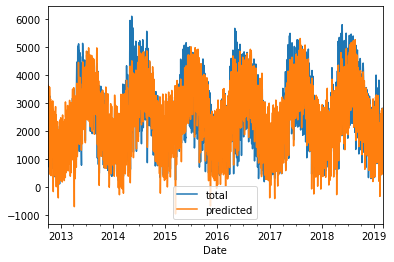

In [234]:
from sklearn.utils import resample
total_daily[['total', 'predicted']].plot()

In [235]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon       -4.193751e+02
Tue       -2.729397e+02
Wed       -3.117648e+02
Thu       -4.694543e+02
Fri       -7.815437e+02
Sat       -2.156315e+03
Sun       -2.208346e+03
holiday   -1.284451e+03
PRCP      -2.105698e+17
dry day    5.369602e+02
Temp       6.097304e+07
annual     3.945620e+01
dtype: float64

In [236]:
from sklearn.utils import resample

np.random.seed(1)
err = np.std(
    [model.fit(*resample(X, y)).coef_ for i in range(1000)], 0)

print(pd.DataFrame({'effect': params.round(0), 'error': err.round(0)}))

               effect         error
Mon     -4.190000e+02  1.300000e+02
Tue     -2.730000e+02  1.350000e+02
Wed     -3.120000e+02  1.320000e+02
Thu     -4.690000e+02  1.320000e+02
Fri     -7.820000e+02  1.290000e+02
Sat     -2.156000e+03  1.340000e+02
Sun     -2.208000e+03  1.300000e+02
holiday -1.284000e+03  1.040000e+02
PRCP    -2.105698e+17  1.015522e+17
dry day  5.370000e+02  1.040000e+02
Temp     6.097304e+07  1.209630e+06
annual   3.900000e+01  6.000000e+00
